In [157]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [158]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [159]:
df = pd.read_csv('games_info_and_reviews.csv')


In [160]:
df.head()


,game_id,game_name,is_free,genres,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,review_score,owners
0,1744330,No More Heroes 3,False,Action,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,8,"20,000 .. 50,000"
1,1743380,SCP: Doki Doki Anomaly,False,"Indie, RPG","Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,8,"0 .. 20,000"
2,1742450,西游记2021,False,"Adventure, Casual, Indie, RPG, Strategy",Single-player,"30 Sep, 2021",CDN$ 11.49,0,No user reviews,0,0,0,"50,000 .. 100,000"
3,1742470,My Newborn Life In A Harem,False,"Casual, RPG",Single-player,"29 Mar, 2022",CDN$ 14.49,0,Mixed,18,12,5,"0 .. 20,000"
4,1742500,My Dear Frankenstein -English Edition-,False,Adventure,Single-player,"30 Sep, 2021",CDN$ 5.69,0,4 user reviews,4,0,0,"0 .. 20,000"


In [161]:
# Find unique genres across all rows
unique_genres = set()
for genres in df['genres']:
    if genres is not None:
        unique_genres.update(genres.split(', '))

# Create columns for each unique genre
for genre in unique_genres:
    df[genre] = 0

# Assign 1 to corresponding genre columns for each game
for index, row in df.iterrows():
    genres = row['genres']
    if genres is not None:
        for genre in genres.split(', '):
            df.at[index, genre] = 1

# Drop the original 'genres' column
df.drop(columns=['genres'], inplace=True)

print(df)

       game_id                               game_name  is_free  \
0      1744330                        No More Heroes 3    False   
1      1743380                  SCP: Doki Doki Anomaly    False   
2      1742450                                 西游记2021    False   
3      1742470              My Newborn Life In A Harem    False   
4      1742500  My Dear Frankenstein -English Edition-    False   
...        ...                                     ...      ...   
11963   282070                        This War of Mine    False   
11964   703870                            Make a word!    False   
11965  1599660               Sackboy™: A Big Adventure    False   
11966   359550         Tom Clancy's Rainbow Six® Siege    False   
11967  1778820                                TEKKEN 8    False   

                                              categories  release_date  \
0      Single-player, Steam Achievements, Full contro...  11 Oct, 2022   
1                      Single-player, Steam Ach

In [162]:
# List of column names to keep
columns_to_keep = ['game_id', 'game_name', 'Adventure', 'Action', 'RPG', 'Indie']

# Keep only the specified columns in the DataFrame
df1 = df[columns_to_keep]

# Display the updated DataFrame
print(df1)


       game_id                               game_name  Adventure  Action  \
0      1744330                        No More Heroes 3          0       1   
1      1743380                  SCP: Doki Doki Anomaly          0       0   
2      1742450                                 西游记2021          1       0   
3      1742470              My Newborn Life In A Harem          0       0   
4      1742500  My Dear Frankenstein -English Edition-          1       0   
...        ...                                     ...        ...     ...   
11963   282070                        This War of Mine          1       0   
11964   703870                            Make a word!          0       0   
11965  1599660               Sackboy™: A Big Adventure          1       0   
11966   359550         Tom Clancy's Rainbow Six® Siege          0       1   
11967  1778820                                TEKKEN 8          0       1   

       RPG  Indie  
0        0      0  
1        1      1  
2        1     

In [163]:
unique_values = df['review_score_desc'].unique()
print(unique_values)

['Very Positive' 'No user reviews' 'Mixed' '4 user reviews'
 'Mostly Positive' '2 user reviews' 'Positive' '1 user reviews'
 '3 user reviews' '9 user reviews' '5 user reviews' '6 user reviews'
 'Mostly Negative' 'Overwhelmingly Positive' '7 user reviews'
 '8 user reviews' 'Negative' 'Very Negative' 'Overwhelmingly Negative']


In [164]:
# Define the list of desired categories
desired_categories = ['Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive',
                      'Negative', 'Very Negative', 'Mostly Negative', 'Overwhelmingly Negative']

# Create a boolean mask to filter the DataFrame
mask = df['review_score_desc'].isin(desired_categories)

# Apply the mask to filter the DataFrame
filtered_df = df[mask]

# Display the filtered DataFrame
print(filtered_df['review_score_desc'])


0          Very Positive
1          Very Positive
5        Mostly Positive
7          Very Positive
9               Positive
              ...       
11963      Very Positive
11964    Mostly Positive
11965      Very Positive
11966      Very Positive
11967      Very Positive
Name: review_score_desc, Length: 4349, dtype: object


In [165]:
# Define the mapping dictionary
mapping_dict = {
    'Positive': 1,
    'Very Positive': 1,
    'Mostly Positive': 1,
    'Overwhelmingly Positive': 1,
    'Negative': 0,
    'Very Negative': 0,
    'Mostly Negative': 0,
    'Overwhelmingly Negative': 0
}

# Map the values using the mapping dictionary
df['review_score_mapped'] = df['review_score_desc'].map(mapping_dict)

# Display the mapped values
print(df['review_score_mapped'])


0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
11963    1.0
11964    1.0
11965    1.0
11966    1.0
11967    1.0
Name: review_score_mapped, Length: 11968, dtype: float64


In [166]:
# Define the mapping dictionary
mapping_dict = {
    'Positive': 1,
    'Very Positive': 1,
    'Mostly Positive': 1,
    'Overwhelmingly Positive': 1,
    'Negative': 0,
    'Very Negative': 0,
    'Mostly Negative': 0,
    'Overwhelmingly Negative': 0
}

# Map the values using the mapping dictionary
df['review_score_mapped'] = df['review_score_desc'].map(mapping_dict)

# Remove null values
df.dropna(subset=['review_score_mapped'], inplace=True)

# Display the mapped values
print(df['review_score_mapped'])


0        1.0
1        1.0
5        1.0
7        1.0
9        1.0
        ... 
11963    1.0
11964    1.0
11965    1.0
11966    1.0
11967    1.0
Name: review_score_mapped, Length: 4349, dtype: float64


In [167]:
df['review_score_mapped'].value_counts()

1.0    4133
0.0     216
Name: review_score_mapped, dtype: int64

In [168]:
df.head()

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,...,休閒,獨立製作,Симулятори,Aktion,Приключенческие игры,Ação,Aksiyon,Video Production,Aventure,review_score_mapped
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,...,0,0,0,0,0,0,0,0,0,1.0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,...,0,0,0,0,0,0,0,0,0,1.0
5,1742590,TEMPUS,False,"Single-player, Steam Achievements, Full contro...","2 Mar, 2022",CDN$ 8.99,0,Mostly Positive,21,6,...,0,0,0,0,0,0,0,0,0,1.0
7,1742610,Spirits of the Hellements - TD,False,"Single-player, Steam Achievements, Steam Cloud","28 Apr, 2022",CDN$ 8.09,0,Very Positive,218,15,...,0,0,0,0,0,0,0,0,0,1.0
9,1742690,Requiem,False,Single-player,"9 Feb, 2022",CDN$ 22.79,0,Positive,13,3,...,0,0,0,0,0,0,0,0,0,1.0


In [169]:
df.columns

Index(['game_id', 'game_name', 'is_free', 'categories', 'release_date',
       'price', 'required_age', 'review_score_desc', 'total_positive_reviews',
       'total_negative_reviews', 'review_score', 'owners', 'Casual', 'Gore',
       'Macera', 'Game Development', 'Дизайн и иллюстрация', 'Дочасний доступ',
       'Free to Play', '冒險', 'Przygodowe', 'Indie', 'Photo Editing', '角色扮演',
       'Early Access', 'Design & Illustration', 'Ранний доступ',
       'Разработка игр', 'Violent', 'Инди', '动作', 'Acesso Antecipado',
       'シミュレーション', 'Утилиты', 'Deportes', '액션', 'Stratégie', 'Стратегии',
       'Occasionnel', 'Animation & Modeling', 'Sexual Content',
       'MM（Massively Multiplayer）', 'Перегони', 'Audio Production', 'RPG',
       'Симуляторы', 'Indépendant', 'アドベンチャー', 'Веб-разработка', 'Aventura',
       'Образование', 'Sports', 'Гонки', 'Strategy', 'Akcja', 'Simulation',
       'Adventure', 'Ролевые игры', 'Экшены', 'Action', 'Web Publishing',
       'Education', '早期アクセス', 'Інді', '

In [170]:
# Define the columns to keep
columns_to_keep = ['game_id', 'game_name', 'is_free', 'categories', 'release_date',
                   'price', 'required_age', 'review_score_desc', 'total_positive_reviews',
                   'total_negative_reviews', 'review_score', 'owners', 'review_score_mapped',
                   'Action', 'RPG', 'Adventure', 'Indie', 'Casual']

# Filter the DataFrame to keep only the specified columns
simple_df = df.loc[:, columns_to_keep]

# Display the filtered DataFrame
# print(simple_df)


In [171]:
simple_df.head()

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,review_score,owners,review_score_mapped,Action,RPG,Adventure,Indie,Casual
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,8,"20,000 .. 50,000",1.0,1,0,0,0,0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,8,"0 .. 20,000",1.0,0,1,0,1,0
5,1742590,TEMPUS,False,"Single-player, Steam Achievements, Full contro...","2 Mar, 2022",CDN$ 8.99,0,Mostly Positive,21,6,6,"20,000 .. 50,000",1.0,0,0,1,1,1
7,1742610,Spirits of the Hellements - TD,False,"Single-player, Steam Achievements, Steam Cloud","28 Apr, 2022",CDN$ 8.09,0,Very Positive,218,15,8,"0 .. 20,000",1.0,0,0,0,0,0
9,1742690,Requiem,False,Single-player,"9 Feb, 2022",CDN$ 22.79,0,Positive,13,3,7,"0 .. 20,000",1.0,1,1,1,1,0


In [172]:
simple_df['price'].value_counts()

CDN$ 6.49     225
CDN$ 1.29     188
CDN$ 11.49    179
CDN$ 12.99    173
CDN$ 5.69     141
             ... 
$15.99          1
3.00 AED        1
6.00 AED        1
21.00 AED       1
$69.99          1
Name: price, Length: 525, dtype: int64

In [173]:
# Extract unique currencies from the 'price' column
unique_currencies = simple_df['price'].apply(lambda x: x.split()[0]).unique()

# Count the number of unique currencies
num_unique_currencies = len(unique_currencies)

print("Number of different currencies:", num_unique_currencies)
print("Unique currencies:", unique_currencies)


Number of different currencies: 137
Unique currencies: ['CDN$' '₩' '¥' '$49.99' '19,50€' '6,59€' '4,99€' '14,79€' '9,75€' '$1.99'
 '$10.79' '8,19€' '₹' '$4.99' '$12.49' '32' '1,99€' '$3.99' '740₴' '99₴'
 '699₴' '159₴' '325₴' '13₴' '169₴' '229₴' '80₴' '329₴' '429₴' '44₴' '279₴'
 '124₴' '199₴' '379₴' '74₴' '149₴' '949₴' '129₴' '119₴' '26₴' '225₴' '14₴'
 '24,99€' '415₴' '399₴' '209₴' '375₴' '109₴' '349₴' '340₴' '$19.99' '39₴'
 '59₴' '135₴' '79₴' '50₴' '245₴' '515₴' '153₴' '21₴' '89₴' '40₴' '385'
 '28,99€' '$10.49' '19,99€' 'R$' '$39.99' 'RM47.00' '$14.99' '$9.99'
 '$12.99' '$13.99' '$2.99' '$0.99' '6,99€' '$6.99' '$2.59' '£23.79'
 '$11.99' '16,79€' '$18.99' '21.00' '6.00' '15.00' '3.00' '$15.99'
 '29,69€' '52.93' 'COL$' '$24.99' '$8.99' '$7.99' '14,99€' '£33.50' '782'
 '24,50€' '17,99zł' 'Free' '£49.99' '$0.59' '$5.99' '$2.24' '9,99€'
 '12,49€' '49,99€' '8,99€' '$0.77' '29,99€' '59,99€' '£10.99' '$10.99'
 '$29.99' '435' '61' '299₴' '18,99€' '$59.99' '549' '19,90€' '$9.59' '419'
 '138,99zł

In [174]:
# Filter the DataFrame to keep only 'CDN$' and 'USD' currencies
filtered_df = simple_df[simple_df['price'].str.startswith(('CDN$', '$'))]

# Check the filtered DataFrame
print(filtered_df['price'])


0        CDN$ 49.99
1         CDN$ 6.69
5         CDN$ 8.99
7         CDN$ 8.09
9        CDN$ 22.79
            ...    
11959    CDN$ 39.99
11961    CDN$ 25.99
11962    CDN$ 12.99
11965    CDN$ 39.99
11967        $69.99
Name: price, Length: 4096, dtype: object


In [175]:
filtered_df['price'].value_counts()

CDN$ 6.49      225
CDN$ 1.29      188
CDN$ 11.49     179
CDN$ 12.99     173
CDN$ 5.69      141
              ... 
CDN$ 15.36       1
CDN$ 106.72      1
CDN$ 6.00        1
CDN$ 11.00       1
$69.99           1
Name: price, Length: 367, dtype: int64

In [176]:
filtered_df.head(20)

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,review_score,owners,review_score_mapped,Action,RPG,Adventure,Indie,Casual
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,8,"20,000 .. 50,000",1.0,1,0,0,0,0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,8,"0 .. 20,000",1.0,0,1,0,1,0
5,1742590,TEMPUS,False,"Single-player, Steam Achievements, Full contro...","2 Mar, 2022",CDN$ 8.99,0,Mostly Positive,21,6,6,"20,000 .. 50,000",1.0,0,0,1,1,1
7,1742610,Spirits of the Hellements - TD,False,"Single-player, Steam Achievements, Steam Cloud","28 Apr, 2022",CDN$ 8.09,0,Very Positive,218,15,8,"0 .. 20,000",1.0,0,0,0,0,0
9,1742690,Requiem,False,Single-player,"9 Feb, 2022",CDN$ 22.79,0,Positive,13,3,7,"0 .. 20,000",1.0,1,1,1,1,0
22,1741400,Wander Hero,False,"Single-player, Steam Achievements, Steam Tradi...","29 Sep, 2023",CDN$ 13.99,0,Positive,37,6,7,"50,000 .. 100,000",1.0,0,1,0,1,0
30,1741640,Shadows of Forbidden Gods,False,Single-player,"15 Jul, 2023",CDN$ 22.79,0,Very Positive,596,38,8,"50,000 .. 100,000",1.0,0,0,0,0,0
38,1741120,Fantasy General,False,"Single-player, Steam Cloud","15 Sep, 2021",CDN$ 2.67,0,Positive,45,3,7,"0 .. 20,000",1.0,0,0,0,0,0
39,1741130,Pacific General,False,"Single-player, Steam Cloud","15 Sep, 2021",CDN$ 2.67,0,Positive,14,3,7,"0 .. 20,000",1.0,0,0,0,0,0
45,1740420,Colors! Maze,False,"Single-player, Steam Achievements, Full contro...","18 Oct, 2021",CDN$ 0.77,0,Mostly Positive,20,6,6,"0 .. 20,000",1.0,0,0,0,1,1


### Logistic Regression Review Score ML

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = filtered_df[['Action', 'RPG', 'Adventure', 'Indie', 'Casual']]
y = filtered_df['review_score_mapped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9573170731707317


In [139]:
filtered_df['review_score_mapped'].value_counts()

1.0    3892
0.0     204
Name: review_score_mapped, dtype: int64

In [23]:
df1=pd.concat([filtered_df[filtered_df['review_score_mapped']==1].sample(frac=0.06),filtered_df[filtered_df['review_score_mapped']==0].sample(frac=1) ] )

In [24]:
df1['required_age']=df1.required_age.astype('int64')

In [25]:
X = df1[['Action', 'RPG', 'is_free','Indie', 'Casual','categories','price','required_age',
                'owners','Adventure',]]
y = df1['review_score_mapped']

In [26]:
df1.categories.value_counts()

Single-player                                                                                                                                                                                                                                                                  75
Single-player, Steam Achievements                                                                                                                                                                                                                                              36
Single-player, Steam Trading Cards                                                                                                                                                                                                                                             14
Single-player, Steam Achievements, Steam Cloud                                                                                                                                    

In [27]:
X

,Action,RPG,is_free,Indie,Casual,categories,price,required_age,owners,Adventure
10590,0,0,False,1,1,"Single-player, Steam Achievements, Full contro...",CDN$ 1.96,0,"0 .. 20,000",0
5670,0,0,False,1,0,"Single-player, Steam Achievements, Full contro...",CDN$ 7.39,0,"50,000 .. 100,000",1
3605,0,0,False,1,0,"Single-player, Steam Achievements",$11.99,0,"0 .. 20,000",1
6129,1,1,False,1,0,"Multi-player, MMO, PvP, Online PvP, Co-op, Onl...",CDN$ 49.99,0,"50,000 .. 100,000",1
6082,0,0,False,1,0,"Single-player, Steam Achievements, Steam Cloud",CDN$ 10.99,0,"20,000 .. 50,000",1
...,...,...,...,...,...,...,...,...,...,...
10838,0,0,False,0,0,Single-player,CDN$ 1.29,0,"50,000 .. 100,000",0
3788,1,0,False,0,0,"Single-player, Steam Achievements, Full contro...",CDN$ 3.89,0,"0 .. 20,000",0
6120,1,0,False,1,0,"Single-player, Partial Controller Support",CDN$ 1.09,0,"0 .. 20,000",1
11085,1,1,False,1,0,Single-player,CDN$ 5.49,0,"200,000 .. 500,000",0


In [28]:
X.dtypes

Action           int64
RPG              int64
is_free           bool
Indie            int64
Casual           int64
categories      object
price           object
required_age     int64
owners          object
Adventure        int64
dtype: object

In [29]:
cat_columns=X.select_dtypes(include=['object','category','bool']).columns

In [30]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for col in cat_columns:
    X[col]=lab.fit_transform(X[col])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12996\1533774723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=lab.fit_transform(X[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12996\1533774723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=lab.fit_transform(X[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12996\1533774723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [31]:
X

,Action,RPG,is_free,Indie,Casual,categories,price,required_age,owners,Adventure
10590,0,0,0,1,1,106,16,0,0,0
5670,0,0,0,1,0,103,102,0,8,1
3605,0,0,0,1,0,99,1,0,0,1
6129,1,1,0,1,0,4,85,0,8,1
6082,0,0,0,1,0,133,22,0,5,1
...,...,...,...,...,...,...,...,...,...,...
10838,0,0,0,0,0,12,13,0,8,0
3788,1,0,0,0,0,102,65,0,0,0
6120,1,0,0,1,0,96,10,0,0,1
11085,1,1,0,1,0,12,86,0,6,0


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, random_state=0)

In [33]:
X.isna().sum()

Action          0
RPG             0
is_free         0
Indie           0
Casual          0
categories      0
price           0
required_age    0
owners          0
Adventure       0
dtype: int64

In [34]:
#!pip install lightgbm
import lightgbm as lgb

In [35]:
gbm=lgb.LGBMClassifier(
                        learning_rate=0.01,
                        n_estimators=100,
                  max_depth=10,
                  num_leaves=9,
                 )

In [36]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        callbacks=[lgb.early_stopping(5)])

[LightGBM] [Info] Number of positive: 175, number of negative: 153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533537 -> initscore=0.134348
[LightGBM] [Info] Start training from score 0.134348
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.468357	valid_0's binary_logloss: 0.65867


LGBMClassifier(learning_rate=0.01, max_depth=10, num_leaves=9)

In [37]:
pred= gbm.predict(X_test)

In [38]:
pred[0:10]

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 1.])

In [39]:
y_test.to_list()[0:10]

[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]

In [40]:
pred1= gbm.predict(X_train)
print(classification_report(y_train, pred1))

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72       153
         1.0       0.75      0.79      0.77       175

    accuracy                           0.74       328
   macro avg       0.74      0.74      0.74       328
weighted avg       0.74      0.74      0.74       328



In [41]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.58      0.55      0.57        51
         1.0       0.63      0.66      0.64        59

    accuracy                           0.61       110
   macro avg       0.61      0.61      0.61       110
weighted avg       0.61      0.61      0.61       110



In [42]:
confusion_matrix(y_test, pred)

array([[28, 23],
       [20, 39]], dtype=int64)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

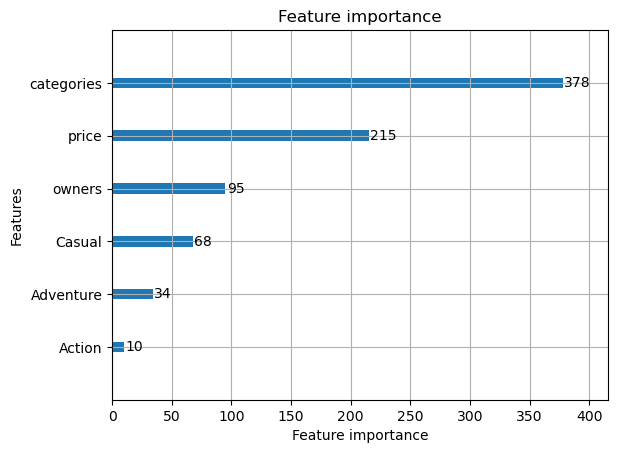

In [43]:
lgb.plot_importance(gbm)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 4, number of negative: 22
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153846 -> initscore=-1.704748
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

[LightGBM] [Info] Number of positive: 52, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 104, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 140, number of negative: 122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534351 -> initscore=0.137621
[LightGBM] [Info] Start training from score 0.137621
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 8, number of negative: 18
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.

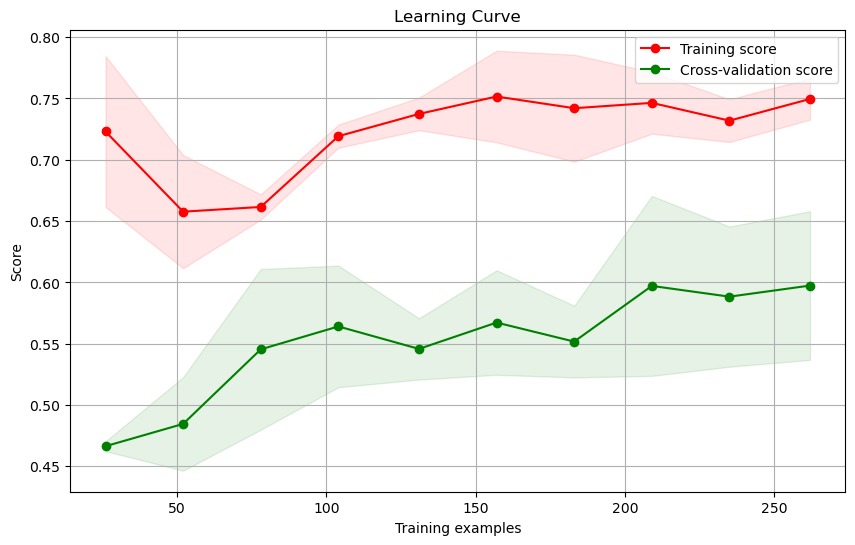

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, train_sizes, cv=None, scoring=None):
    """
    Plot learning curve for an estimator.
    
    Parameters:
        estimator (object): The estimator object.
        X (array-like): The feature matrix.
        y (array-like): The target vector.
        train_sizes (array-like): The sizes of the training data subsets to use.
        cv (int or cross-validation generator, optional): Determines the cross-validation splitting strategy.
        scoring (str or callable, optional): The scoring method for evaluation.
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Example usage:
plot_learning_curve(gbm, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')


### Owner popularity to genre

In [177]:
# Assuming filtered_df is your original DataFrame
# Create a copy of the DataFrame to perform conversions
gbr_df = filtered_df.copy()

# Display unique values in the 'owners' column before handling
print("Unique values in 'owners' column before handling:")
print(gbr_df['owners'].unique())

# Define a function to preprocess and convert the 'owners' column to float
def preprocess_owners(value):
    if isinstance(value, str):
        # Remove currency symbols and units
        value = value.replace('CDN$', '').replace('USD', '').replace('$', '').replace(' ', '').replace(',', '')

        # For range values, take the average
        if '..' in value:
            range_values = value.split('..')
            value = (float(range_values[0]) + float(range_values[1])) / 2
        else:
            value = float(value)
    return value

# Apply the preprocessing function to the 'owners' column
gbr_df['owners'] = gbr_df['owners'].apply(preprocess_owners)

# Display unique values in the 'owners' column after handling
print("\nUnique values in 'owners' column after handling:")
print(gbr_df['owners'].unique())

# Assuming 'price' column contains ranges like '50,000 .. 100,000'
def convert_price_range_to_float(price_range):
    if '..' in price_range:
        min_price, max_price = map(float, price_range.split(' .. '))
        return (min_price + max_price) / 2
    else:
        return float(price_range.replace(',', ''))  # Remove commas from string before converting to float

# Ensure 'price' column is treated as string
gbr_df['price'] = gbr_df['price'].astype(str)

# Remove currency symbols and commas from the 'price' column and convert it to float
gbr_df['price'] = gbr_df['price'].str.replace('[^\d.]', '', regex=True)
gbr_df['price'] = gbr_df['price'].apply(convert_price_range_to_float)

# Print the unique values in the 'price' column to check for any remaining strings
print(gbr_df['price'].unique())


Unique values in 'owners' column before handling:
['20,000 .. 50,000' '0 .. 20,000' '50,000 .. 100,000' '200,000 .. 500,000'
 '100,000 .. 200,000' '500,000 .. 1,000,000' '1,000,000 .. 2,000,000'
 '2,000,000 .. 5,000,000' '5,000,000 .. 10,000,000'
 '10,000,000 .. 20,000,000' '20,000,000 .. 50,000,000']

Unique values in 'owners' column after handling:
[3.5e+04 1.0e+04 7.5e+04 3.5e+05 1.5e+05 7.5e+05 1.5e+06 3.5e+06 7.5e+06
 1.5e+07 3.5e+07]
[ 49.99   6.69   8.99   8.09  22.79  13.99   2.67   0.77  10.49  17.49
  29.99   3.89  12.99   5.69   2.59   1.29  18.19  14.49   3.39  17.99
   4.99   1.19   4.65  28.99  11.49  19.49   6.99   6.49  10.    24.79
  13.64   5.35  54.99  11.99   1.62   2.29   1.55   7.99  51.49  15.49
  19.99  25.99   4.37  79.99  33.99  42.    17.22  39.99  45.49  20.79
  13.49   1.99  10.79  13.31  12.49  21.79   4.21  23.49   0.89  18.23
  56.99   0.9    3.05  16.99  10.29  57.99   7.79   4.8    3.74  19.9
  38.99   9.74  26.99  12.69   1.17   3.24  64.99   5.19   1

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X_gbr) and target variable (y_gbr)
X_gbr = gbr_df[['price', 'required_age','Action', 'RPG','total_negative_reviews','total_positive_reviews'
                ]]  
y_gbr = gbr_df['owners']

# Split the data into training and testing sets
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr, y_gbr, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
model_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gbr.fit(X_train_gbr, y_train_gbr)

# Predict on the test set
y_pred_gbr = model_gbr.predict(X_test_gbr)

# Evaluate the model
mae_gbr = mean_absolute_error(y_test_gbr, y_pred_gbr)
print("Mean Absolute Error (MAE):", mae_gbr)

r2_gbr = r2_score(y_test_gbr, y_pred_gbr)
print("R-squared (R^2):", r2_gbr)


Mean Absolute Error (MAE): 140681.14375514007
R-squared (R^2): 0.8914689666024088


In [197]:
# Access feature importance scores
feature_importance_scores = model_gbr.feature_importances_

# Get feature names
feature_names = X_gbr.columns

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)


                  Feature  Importance
5  total_positive_reviews    0.911963
4  total_negative_reviews    0.051505
0                   price    0.022365
2                  Action    0.011473
3                     RPG    0.001853
1            required_age    0.000841


In [200]:
# Calculate the mean of the 'owners' column
average_owners = gbr_df['owners'].mean()

# Print the average number of owners
print("Average number of owners:", average_owners)

# Compare the MAE to the average number of owners
if mae_gbr > average_owners:
    print("The MAE is relatively large compared to the average number of owners.")
else:
    print("The MAE is relatively small compared to the average number of owners.")


Average number of owners: 305689.697265625
The MAE is relatively small compared to the average number of owners.
